## **GSR**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

gsr=pd.read_csv('38_GSR.csv')
gsr.head()

UnixTime  Row QuestionKey                   Timestamp  SampleNumber  \
0  1.676983e+09    1         NaN  2023-02-21 18:01:22.036998           NaN   
1  1.676983e+09    2         NaN  2023-02-21 18:01:22.041059       71110.0   
2  1.676983e+09    3         NaN  2023-02-21 18:01:22.048871       71111.0   
3  1.676983e+09    4         NaN  2023-02-21 18:01:22.056684       71112.0   
4  1.676983e+09    5         NaN  2023-02-21 18:01:22.064496       71113.0   

   Timestamp RAW  Timestamp CAL  System Timestamp CAL  VSenseBatt RAW  \
0            NaN            NaN                   NaN             NaN   
1      2832752.0    555546.8750          1.676983e+12          2573.0   
2      2833008.0    555554.6875          1.676983e+12          2566.0   
3      2833264.0    555562.5000          1.676983e+12          2577.0   
4      2833520.0    555570.3125          1.676983e+12          2571.0   

   VSenseBatt CAL  GSR RAW  GSR Resistance CAL  GSR Conductance CAL  \
0             NaN      NaN                 NaN                  NaN   
1     3747.343590  35305.0          368.023726             2.717216   
2     3737.148718  35306.0          367.825384             2.718681   
3     3753.169231  35306.0          367.825384             2.718681   
4     3744.430769  35306.0          367.825384             2.718681   

   Packet reception rate RAW  
0                        NaN  
1                       85.0  
2                       85.0  
3                       85.0  
4                       85.0

In [2]:
gsr.isnull().sum()

UnixTime                         0
Row                              0
QuestionKey                  43852
Timestamp                        0
SampleNumber                     4
Timestamp RAW                    4
Timestamp CAL                    4
System Timestamp CAL             4
VSenseBatt RAW                   4
VSenseBatt CAL                   4
GSR RAW                          4
GSR Resistance CAL               4
GSR Conductance CAL              4
Packet reception rate RAW        4
dtype: int64

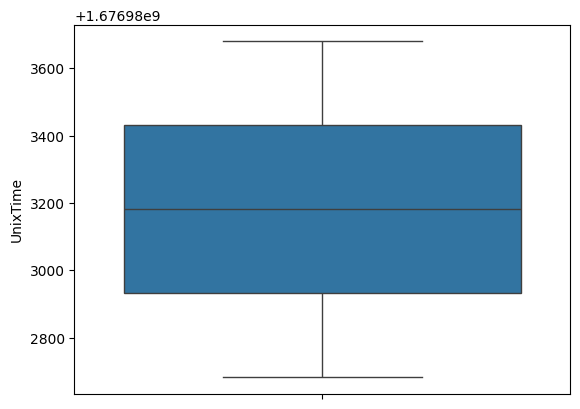

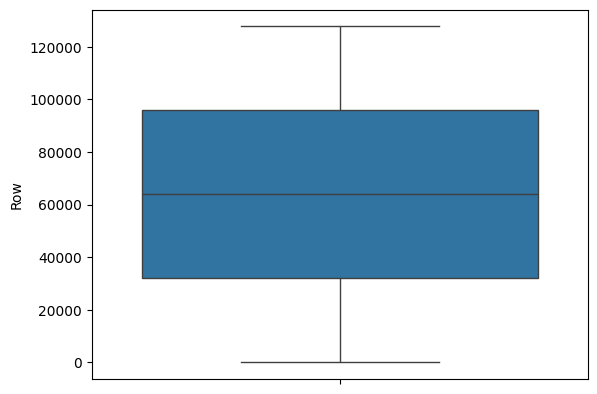

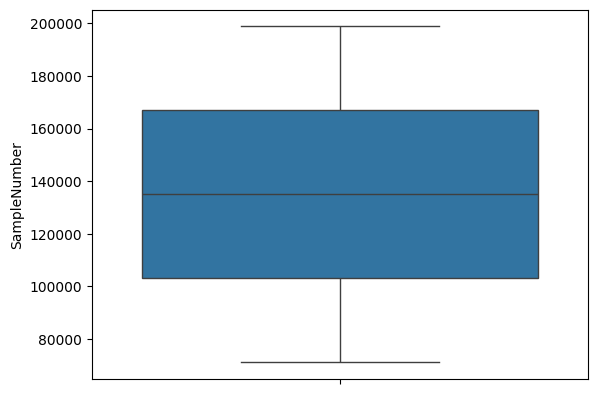

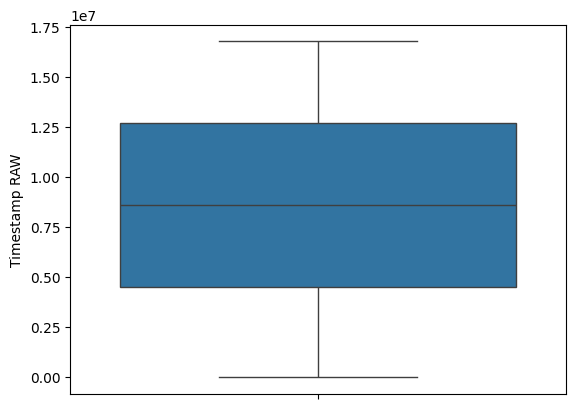

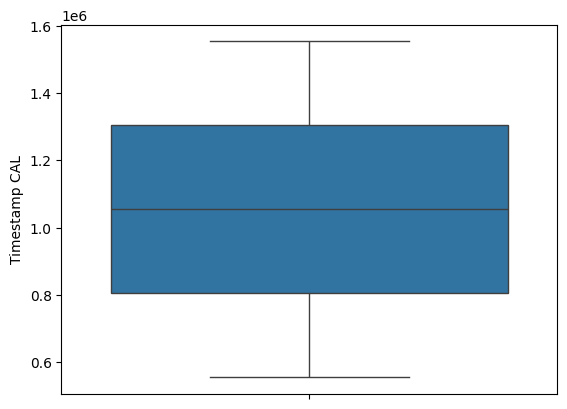

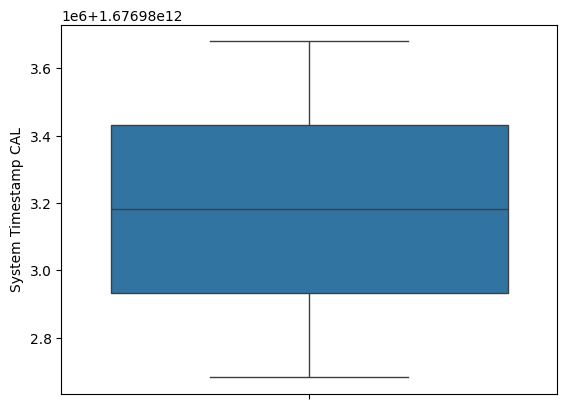

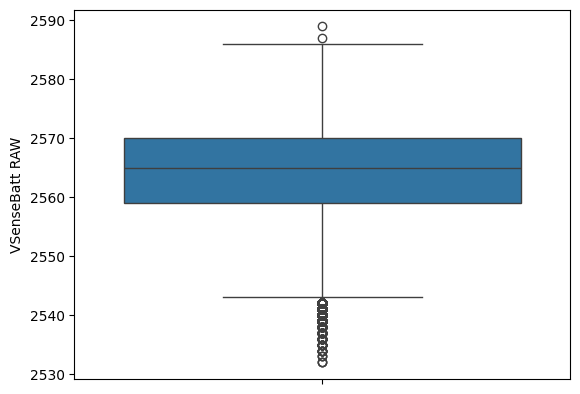

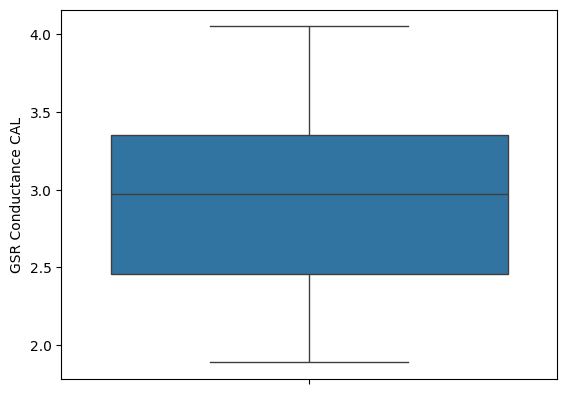

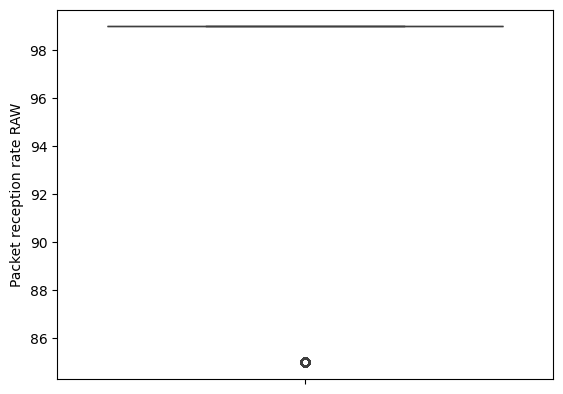

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
gsr_ol=gsr.select_dtypes(include=['float64','int64']).columns
for col in gsr_ol:
    
   sns.boxplot(data=gsr[col])
   plt.xticks(rotation=45)
   plt.show()

In [4]:
print(gsr.columns.tolist())

['UnixTime', 'Row', 'QuestionKey', 'Timestamp', 'SampleNumber', 'Timestamp RAW', 'Timestamp CAL', 'System Timestamp CAL', 'VSenseBatt RAW', 'VSenseBatt CAL', 'GSR RAW', 'GSR Resistance CAL', 'GSR Conductance CAL', 'Packet reception rate RAW']


In [5]:
gsr=gsr.dropna(subset=['SampleNumber', 'Timestamp RAW', 'Timestamp CAL', 'System Timestamp CAL', 'VSenseBatt RAW', 'VSenseBatt CAL', 'GSR RAW', 'GSR Resistance CAL', 'GSR Conductance CAL', 'Packet reception rate RAW'])

In [6]:
gsr.isnull().sum()

UnixTime                         0
Row                              0
QuestionKey                  43848
Timestamp                        0
SampleNumber                     0
Timestamp RAW                    0
Timestamp CAL                    0
System Timestamp CAL             0
VSenseBatt RAW                   0
VSenseBatt CAL                   0
GSR RAW                          0
GSR Resistance CAL               0
GSR Conductance CAL              0
Packet reception rate RAW        0
dtype: int64

In [7]:
for col in gsr.select_dtypes(include=['object']).columns:
    gsr[col]=gsr[col].fillna(gsr[col].mode()[0])

In [8]:
gsr.isnull().sum()

UnixTime                     0
Row                          0
QuestionKey                  0
Timestamp                    0
SampleNumber                 0
Timestamp RAW                0
Timestamp CAL                0
System Timestamp CAL         0
VSenseBatt RAW               0
VSenseBatt CAL               0
GSR RAW                      0
GSR Resistance CAL           0
GSR Conductance CAL          0
Packet reception rate RAW    0
dtype: int64

In [9]:
gsr['Timestamp']=pd.to_datetime(gsr['Timestamp'], errors='coerce')

In [10]:
gsr.head()

UnixTime  Row QuestionKey                  Timestamp  SampleNumber  \
1  1.676983e+09    2      1Item8 2023-02-21 18:01:22.041059       71110.0   
2  1.676983e+09    3      1Item8 2023-02-21 18:01:22.048871       71111.0   
3  1.676983e+09    4      1Item8 2023-02-21 18:01:22.056684       71112.0   
4  1.676983e+09    5      1Item8 2023-02-21 18:01:22.064496       71113.0   
5  1.676983e+09    6      1Item8 2023-02-21 18:01:22.072309       71114.0   

   Timestamp RAW  Timestamp CAL  System Timestamp CAL  VSenseBatt RAW  \
1      2832752.0    555546.8750          1.676983e+12          2573.0   
2      2833008.0    555554.6875          1.676983e+12          2566.0   
3      2833264.0    555562.5000          1.676983e+12          2577.0   
4      2833520.0    555570.3125          1.676983e+12          2571.0   
5      2833776.0    555578.1250          1.676983e+12          2570.0   

   VSenseBatt CAL  GSR RAW  GSR Resistance CAL  GSR Conductance CAL  \
1     3747.343590  35305.0          368.023726             2.717216   
2     3737.148718  35306.0          367.825384             2.718681   
3     3753.169231  35306.0          367.825384             2.718681   
4     3744.430769  35306.0          367.825384             2.718681   
5     3742.974359  35306.0          367.825384             2.718681   

   Packet reception rate RAW  
1                       85.0  
2                       85.0  
3                       85.0  
4                       85.0  
5                       85.0

In [11]:
gsr.dtypes

UnixTime                            float64
Row                                   int64
QuestionKey                          object
Timestamp                    datetime64[ns]
SampleNumber                        float64
Timestamp RAW                       float64
Timestamp CAL                       float64
System Timestamp CAL                float64
VSenseBatt RAW                      float64
VSenseBatt CAL                      float64
GSR RAW                             float64
GSR Resistance CAL                  float64
GSR Conductance CAL                 float64
Packet reception rate RAW           float64
dtype: object

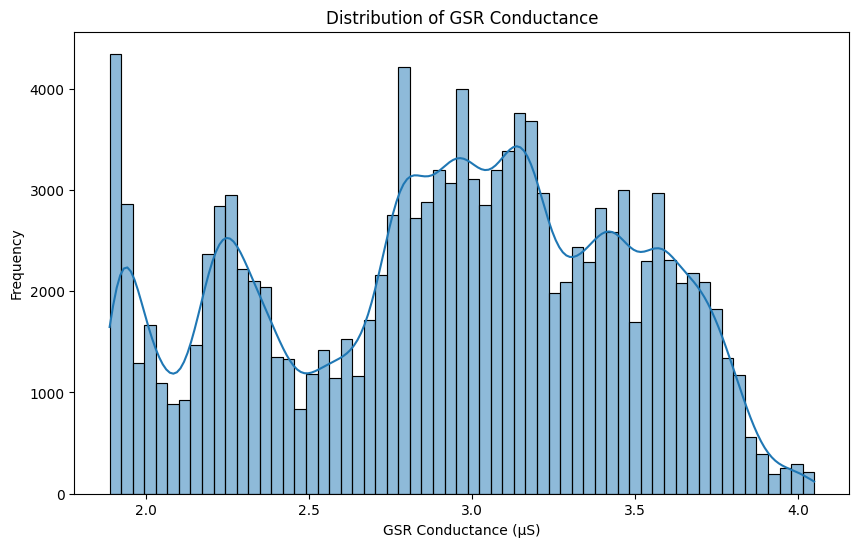

In [12]:
# 1. GSR Conductance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(gsr['GSR Conductance CAL'], kde=True)
plt.title('Distribution of GSR Conductance')
plt.xlabel('GSR Conductance (µS)')
plt.ylabel('Frequency')
# plt.savefig('gsr_conductance_distribution.png')
plt.show()

* Multiple peaks (modes): The distribution is not unimodal (not a single peak like a normal distribution); it has multiple peaks at various conductance levels.
* The values span approximately from 1.8 µS to 4.0 µS.
* The distribution is not normal; it looks multimodal, possibly reflecting different physiological states (e.g., rest vs. stress) during the experiment.

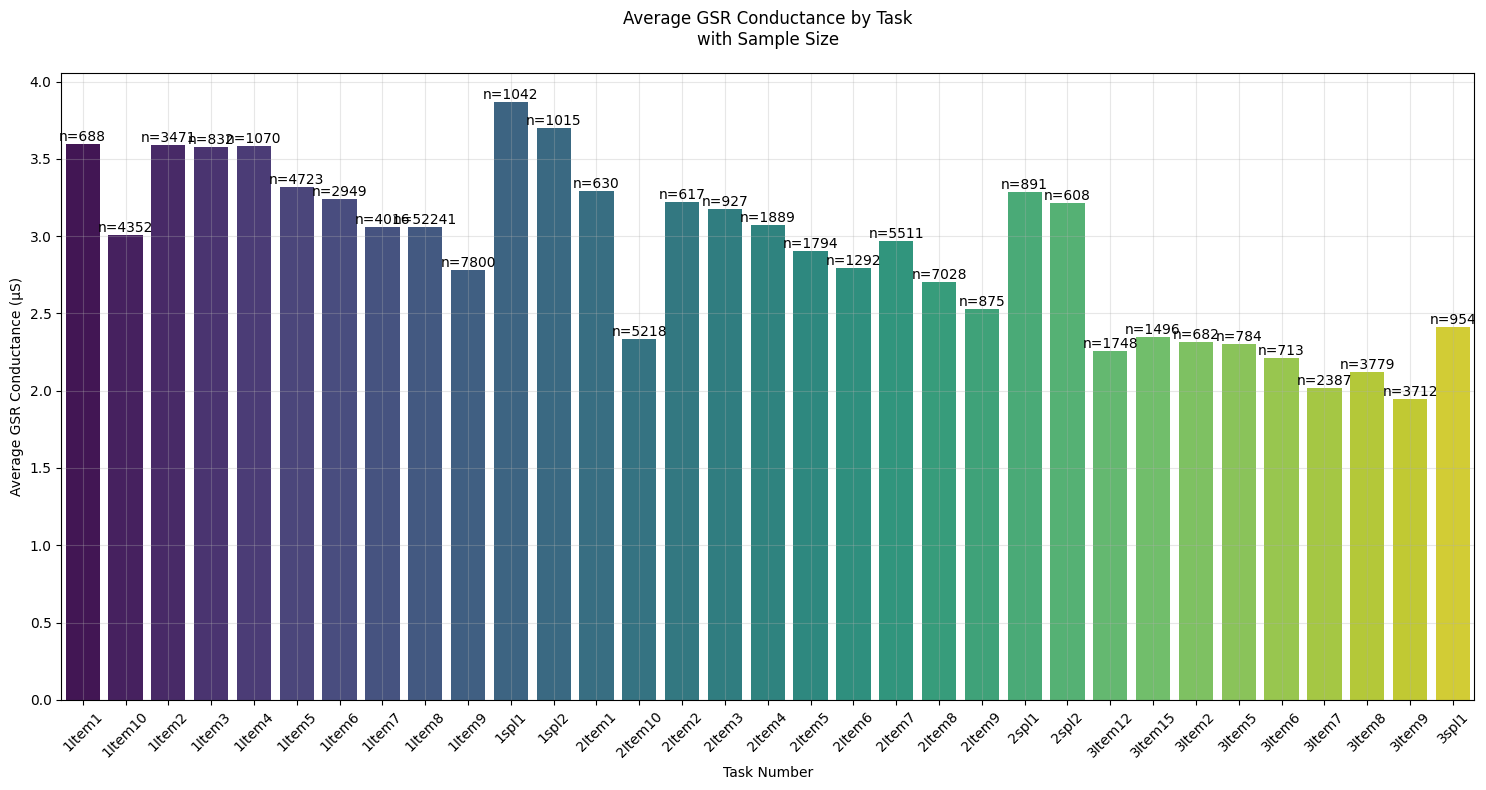

In [13]:
# Grouping GSR data by QuestionKey and calculating stats
task_gsr = gsr.groupby('QuestionKey')['GSR Conductance CAL'].agg(['mean', 'count']).reset_index()

# Set up the plot
plt.figure(figsize=(15, 8))

# Create a barplot of the mean GSR for each task
# ax = sns.barplot(x='QuestionKey', y='mean', data=task_gsr, palette='viridis')
ax = sns.barplot(x='QuestionKey', y='mean', data=task_gsr, hue='QuestionKey', palette='viridis', legend=False)

# Add text labels on each bar showing the sample size
for i, row in task_gsr.iterrows():
    plt.text(i, row['mean'], f'n={int(row["count"])}', 
             ha='center', va='bottom')

# Title and axis labels
plt.title('Average GSR Conductance by Task\nwith Sample Size', pad=20)
plt.xlabel('Task Number')
plt.ylabel('Average GSR Conductance (µS)')

# Improve readability: rotate x-axis labels
plt.xticks(rotation=45)

# Add a light grid
plt.grid(True, alpha=0.3)

# Adjust layout to fit elements nicely
plt.tight_layout()

# Save the figure as a PNG with high resolution
# plt.savefig('gsr_by_task_no_errorbar.png', bbox_inches='tight', dpi=300)

# Close the plot (good practice when generating multiple plots)
plt.show()


* Tasks like Item1 and Item2 have higher average GSR (~3.5 µS or more).

* GSR conductance gradually decreases for later tasks (e.g., 3Item9, 3Item1), where averages drop below 3.0 µS.

* Some tasks have larger sample sizes (n=7000+), which generally increases confidence in the mean. Others have smaller sample sizes (e.g., n=600), which could make those averages less reliable.

In [14]:
gsr.columns.tolist()

['UnixTime',
 'Row',
 'QuestionKey',
 'Timestamp',
 'SampleNumber',
 'Timestamp RAW',
 'Timestamp CAL',
 'System Timestamp CAL',
 'VSenseBatt RAW',
 'VSenseBatt CAL',
 'GSR RAW',
 'GSR Resistance CAL',
 'GSR Conductance CAL',
 'Packet reception rate RAW']

In [16]:
gsr.head()

UnixTime  Row QuestionKey                  Timestamp  SampleNumber  \
1  1.676983e+09    2      1Item8 2023-02-21 18:01:22.041059       71110.0   
2  1.676983e+09    3      1Item8 2023-02-21 18:01:22.048871       71111.0   
3  1.676983e+09    4      1Item8 2023-02-21 18:01:22.056684       71112.0   
4  1.676983e+09    5      1Item8 2023-02-21 18:01:22.064496       71113.0   
5  1.676983e+09    6      1Item8 2023-02-21 18:01:22.072309       71114.0   

   Timestamp RAW  Timestamp CAL  System Timestamp CAL  VSenseBatt RAW  \
1      2832752.0    555546.8750          1.676983e+12          2573.0   
2      2833008.0    555554.6875          1.676983e+12          2566.0   
3      2833264.0    555562.5000          1.676983e+12          2577.0   
4      2833520.0    555570.3125          1.676983e+12          2571.0   
5      2833776.0    555578.1250          1.676983e+12          2570.0   

   VSenseBatt CAL  GSR RAW  GSR Resistance CAL  GSR Conductance CAL  \
1     3747.343590  35305.0          368.023726             2.717216   
2     3737.148718  35306.0          367.825384             2.718681   
3     3753.169231  35306.0          367.825384             2.718681   
4     3744.430769  35306.0          367.825384             2.718681   
5     3742.974359  35306.0          367.825384             2.718681   

   Packet reception rate RAW  
1                       85.0  
2                       85.0  
3                       85.0  
4                       85.0  
5                       85.0

## **PSY**

In [17]:
import pandas as pd
psy=pd.read_csv('38_PSY.csv')
psy.head()

Key  Category QuestionNumber matchOrnomatch Difficulty    verdict  \
0   1spl1         1           spl1          match       Easy    CORRECT   
1   1spl2         1           spl2        nomatch       Easy    CORRECT   
2  1Item1         1          Item1          match       Easy    CORRECT   
3  1Item2         1          Item2          match       Easy  INCORRECT   
4  1Item3         1          Item3          match       Easy    CORRECT   

   ResponseTime  routineStart          routineStamp    routineEnd  \
0      8.138189  1.676983e+09  21/02/2023, 18:02:42  1.676983e+09   
1      7.932416  1.676983e+09  21/02/2023, 18:02:50  1.676983e+09   
2      5.371872  1.676983e+09  21/02/2023, 18:02:58  1.676983e+09   
3     27.119696  1.676983e+09  21/02/2023, 18:03:04  1.676983e+09   
4      6.499670  1.676983e+09  21/02/2023, 18:03:31  1.676983e+09   

   Cat2FeedbackTime  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [18]:
psy.dtypes

Key                  object
Category              int64
QuestionNumber       object
matchOrnomatch       object
Difficulty           object
verdict              object
ResponseTime        float64
routineStart        float64
routineStamp         object
routineEnd          float64
Cat2FeedbackTime    float64
dtype: object

In [19]:
psy.isnull().sum()

Key                  0
Category             0
QuestionNumber       0
matchOrnomatch       2
Difficulty           2
verdict              2
ResponseTime         0
routineStart         0
routineStamp         0
routineEnd           0
Cat2FeedbackTime    23
dtype: int64

In [20]:
psy.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
dtype: bool

In [21]:
psy['routineStart'] = pd.to_datetime(psy['routineStart'], errors='coerce')
psy['routineEnd'] = pd.to_datetime(psy['routineEnd'], errors='coerce')

In [22]:
psy.dtypes

Key                         object
Category                     int64
QuestionNumber              object
matchOrnomatch              object
Difficulty                  object
verdict                     object
ResponseTime               float64
routineStart        datetime64[ns]
routineStamp                object
routineEnd          datetime64[ns]
Cat2FeedbackTime           float64
dtype: object

In [23]:
psy['routineStamp'] = pd.to_datetime(psy['routineStamp'], dayfirst=True)

In [24]:
psy.dtypes

Key                         object
Category                     int64
QuestionNumber              object
matchOrnomatch              object
Difficulty                  object
verdict                     object
ResponseTime               float64
routineStart        datetime64[ns]
routineStamp        datetime64[ns]
routineEnd          datetime64[ns]
Cat2FeedbackTime           float64
dtype: object

In [25]:
psy.head()

Key  Category QuestionNumber matchOrnomatch Difficulty    verdict  \
0   1spl1         1           spl1          match       Easy    CORRECT   
1   1spl2         1           spl2        nomatch       Easy    CORRECT   
2  1Item1         1          Item1          match       Easy    CORRECT   
3  1Item2         1          Item2          match       Easy  INCORRECT   
4  1Item3         1          Item3          match       Easy    CORRECT   

   ResponseTime                  routineStart        routineStamp  \
0      8.138189 1970-01-01 00:00:01.676982762 2023-02-21 18:02:42   
1      7.932416 1970-01-01 00:00:01.676982770 2023-02-21 18:02:50   
2      5.371872 1970-01-01 00:00:01.676982778 2023-02-21 18:02:58   
3     27.119696 1970-01-01 00:00:01.676982784 2023-02-21 18:03:04   
4      6.499670 1970-01-01 00:00:01.676982811 2023-02-21 18:03:31   

                     routineEnd  Cat2FeedbackTime  
0 1970-01-01 00:00:01.676982770               NaN  
1 1970-01-01 00:00:01.676982778               NaN  
2 1970-01-01 00:00:01.676982784               NaN  
3 1970-01-01 00:00:01.676982811               NaN  
4 1970-01-01 00:00:01.676982817               NaN

In [26]:
psy['ResponseTime'] = psy['ResponseTime'].round(2)

In [27]:
psy.head()

Key  Category QuestionNumber matchOrnomatch Difficulty    verdict  \
0   1spl1         1           spl1          match       Easy    CORRECT   
1   1spl2         1           spl2        nomatch       Easy    CORRECT   
2  1Item1         1          Item1          match       Easy    CORRECT   
3  1Item2         1          Item2          match       Easy  INCORRECT   
4  1Item3         1          Item3          match       Easy    CORRECT   

   ResponseTime                  routineStart        routineStamp  \
0          8.14 1970-01-01 00:00:01.676982762 2023-02-21 18:02:42   
1          7.93 1970-01-01 00:00:01.676982770 2023-02-21 18:02:50   
2          5.37 1970-01-01 00:00:01.676982778 2023-02-21 18:02:58   
3         27.12 1970-01-01 00:00:01.676982784 2023-02-21 18:03:04   
4          6.50 1970-01-01 00:00:01.676982811 2023-02-21 18:03:31   

                     routineEnd  Cat2FeedbackTime  
0 1970-01-01 00:00:01.676982770               NaN  
1 1970-01-01 00:00:01.676982778               NaN  
2 1970-01-01 00:00:01.676982784               NaN  
3 1970-01-01 00:00:01.676982811               NaN  
4 1970-01-01 00:00:01.676982817               NaN

In [28]:
psy.shape

(33, 11)

In [29]:
if 'Cat2FeedbackTime' in psy.columns:
    psy['Cat2FeedbackTime'] = psy['Cat2FeedbackTime'].round(2)

In [30]:
import numpy as np
numeric_cols = psy.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = psy[col].quantile(0.25)
    Q3 = psy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((psy[col] < lower) | (psy[col] > upper)).any():
        outlier_cols.append(col)

In [31]:
for col in psy.columns:
    if psy[col].isnull().any():
        if col in outlier_cols:
            psy[col] = psy[col].fillna(psy[col].median())
        elif psy[col].dtype in ['float64', 'int64']:
            psy[col] = psy[col].fillna(psy[col].mean())
        else:
            psy[col] = psy[col].fillna(psy[col].mode()[0])

In [32]:
psy.isnull().sum()

Key                 0
Category            0
QuestionNumber      0
matchOrnomatch      0
Difficulty          0
verdict             0
ResponseTime        0
routineStart        0
routineStamp        0
routineEnd          0
Cat2FeedbackTime    0
dtype: int64

In [33]:
psy.columns.tolist()

['Key',
 'Category',
 'QuestionNumber',
 'matchOrnomatch',
 'Difficulty',
 'verdict',
 'ResponseTime',
 'routineStart',
 'routineStamp',
 'routineEnd',
 'Cat2FeedbackTime']

In [34]:
psy_cr=psy.select_dtypes(include=['float64','int64'])
psy_corr=psy_cr.corr().round(2)
psy_corr

Category  ResponseTime  Cat2FeedbackTime
Category              1.00         -0.29              0.02
ResponseTime         -0.29          1.00             -0.22
Cat2FeedbackTime      0.02         -0.22              1.00

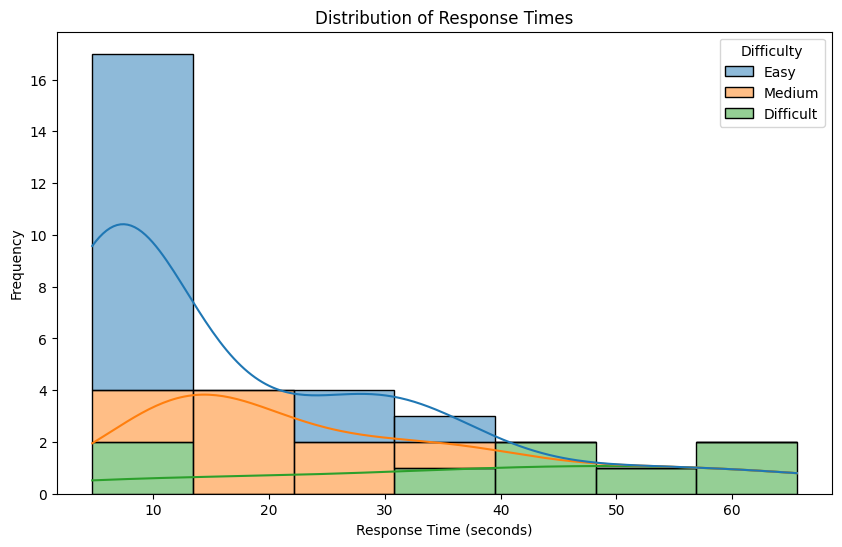

In [35]:
# 1. Response Time Distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# sns.histplot(psy['ResponseTime'], kde=True,)
sns.histplot(data=psy, x='ResponseTime', hue='Difficulty', kde=True, multiple='stack')
plt.title('Distribution of Response Times')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
# plt.savefig('response_time_distribution.png')
plt.show()

The distribution of response times clearly varies by task difficulty. Easy tasks were answered quickly and consistently, while difficult tasks resulted in slower and more variable response times. Medium tasks fell in between. This pattern highlights that task difficulty meaningfully influences the cognitive effort or processing time required during mental rotation tasks.

In [36]:
# Assuming both have a common task identifier — looks like 'QuestionNumber' from PSY vs 'QuestionKey' from GSR
merged_df = pd.merge(gsr, psy, left_on='QuestionKey', right_on='QuestionNumber', how='inner')

print(merged_df.columns)  # Verify merged columns


Index(['UnixTime', 'Row', 'QuestionKey', 'Timestamp', 'SampleNumber',
       'Timestamp RAW', 'Timestamp CAL', 'System Timestamp CAL',
       'VSenseBatt RAW', 'VSenseBatt CAL', 'GSR RAW', 'GSR Resistance CAL',
       'GSR Conductance CAL', 'Packet reception rate RAW', 'Key', 'Category',
       'QuestionNumber', 'matchOrnomatch', 'Difficulty', 'verdict',
       'ResponseTime', 'routineStart', 'routineStamp', 'routineEnd',
       'Cat2FeedbackTime'],
      dtype='object')


In [37]:
print(gsr['QuestionKey'].unique()[:10])
print(psy['QuestionNumber'].unique()[:10])


['1Item8' '1spl1' '1spl2' '1Item1' '1Item2' '1Item3' '1Item4' '1Item5'
 '1Item6' '1Item7']
['spl1' 'spl2' 'Item1' 'Item2' 'Item3' 'Item4' 'Item5' 'Item6' 'Item7'
 'Item8']


In [38]:
# Strip the leading digit from GSR QuestionKey
gsr['CleanKey'] = gsr['QuestionKey'].str.replace(r'^\d+', '', regex=True)

# Verify cleaned keys
print(gsr['CleanKey'].unique()[:10])

['Item8' 'spl1' 'spl2' 'Item1' 'Item2' 'Item3' 'Item4' 'Item5' 'Item6'
 'Item7']


In [39]:
# Now merge on cleaned key
merged_df = pd.merge(gsr, psy, left_on='CleanKey', right_on='QuestionNumber', how='inner')

# Check the result
print(f"Merged data shape: {merged_df.shape}")
print(merged_df.head())

Merged data shape: (359485, 26)
       UnixTime  Row QuestionKey                  Timestamp  SampleNumber  \
0  1.676983e+09    2      1Item8 2023-02-21 18:01:22.041059       71110.0   
1  1.676983e+09    2      1Item8 2023-02-21 18:01:22.041059       71110.0   
2  1.676983e+09    2      1Item8 2023-02-21 18:01:22.041059       71110.0   
3  1.676983e+09    3      1Item8 2023-02-21 18:01:22.048871       71111.0   
4  1.676983e+09    3      1Item8 2023-02-21 18:01:22.048871       71111.0   

   Timestamp RAW  Timestamp CAL  System Timestamp CAL  VSenseBatt RAW  \
0      2832752.0    555546.8750          1.676983e+12          2573.0   
1      2832752.0    555546.8750          1.676983e+12          2573.0   
2      2832752.0    555546.8750          1.676983e+12          2573.0   
3      2833008.0    555554.6875          1.676983e+12          2566.0   
4      2833008.0    555554.6875          1.676983e+12          2566.0   

   VSenseBatt CAL  ...  Category  QuestionNumber  matchOrnomatch  

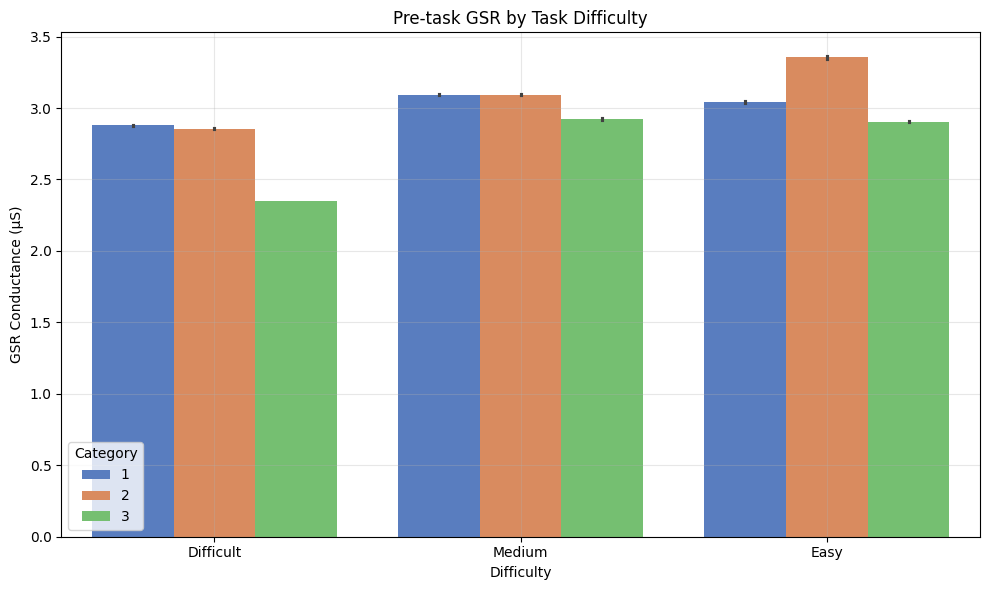

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Difficulty', y='GSR Conductance CAL', data=merged_df, palette='muted',hue='Category')
plt.title('Pre-task GSR by Task Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('GSR Conductance (µS)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


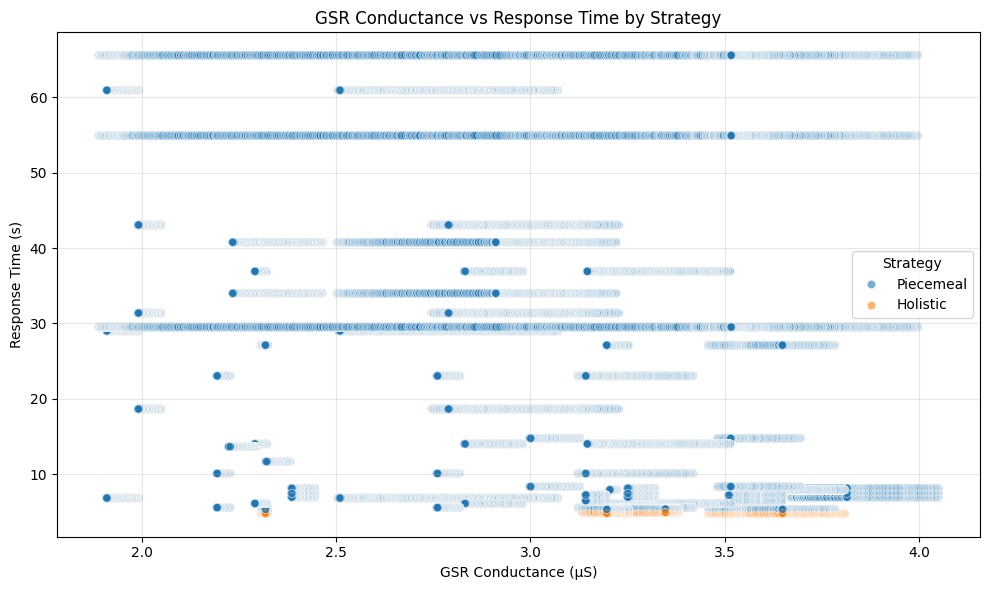

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GSR Conductance CAL', y='ResponseTime', hue='Strategy', data=merged_df, alpha=0.6)
plt.title('GSR Conductance vs Response Time by Strategy')
plt.xlabel('GSR Conductance (µS)')
plt.ylabel('Response Time (s)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


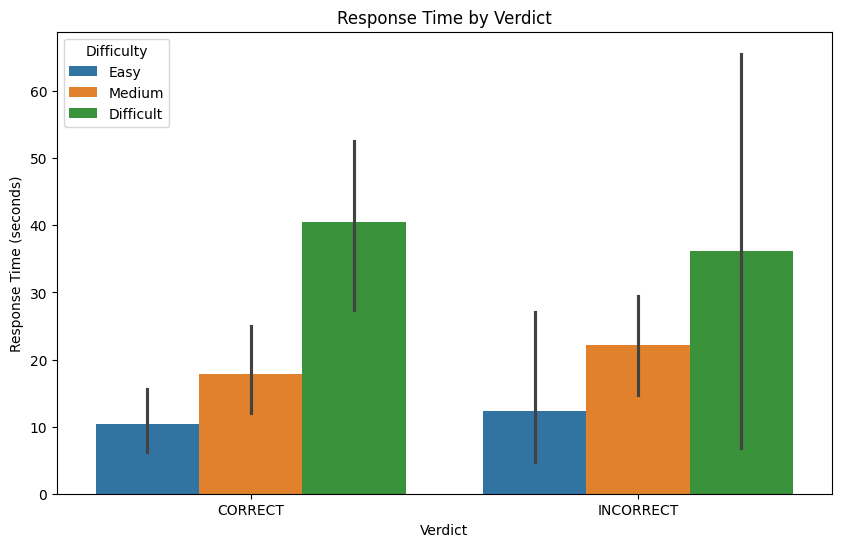

In [44]:
# 3. Response Time by Verdict
plt.figure(figsize=(10, 6))
sns.barplot(x='verdict', y='ResponseTime', data=psy,hue='Difficulty')
plt.title('Response Time by Verdict')
plt.xlabel('Verdict')
plt.ylabel('Response Time (seconds)')
# plt.savefig('response_time_by_verdict.png')
plt.show()

## **TIVA**

In [45]:
tv=pd.read_csv('38_TIVA.csv')
tv.head()

UnixTime  Row QuestionKey                   Timestamp  SampleNumber  \
0  1.676983e+09    1         NaN  2023-02-21 18:01:22.036998          -1.0   
1  1.676983e+09    2         NaN  2023-02-21 18:01:22.132006          -1.0   
2  1.676983e+09    3         NaN  2023-02-21 18:01:22.229287          -1.0   
3  1.676983e+09    4         NaN  2023-02-21 18:01:22.324054           NaN   
4  1.676983e+09    5         NaN  2023-02-21 18:01:22.342102           0.0   

      Anger  Contempt   Disgust      Fear        Joy  ...  Nose Wrinkle  \
0  0.019623  0.000107  0.009617  0.588572  99.979607  ...      0.363238   
1  0.016863  0.000107  0.008414  0.816504  99.979622  ...      0.807614   
2  0.019195  0.000107  0.009411  0.628486  99.979607  ...      0.217207   
3       NaN       NaN       NaN       NaN        NaN  ...           NaN   
4       NaN       NaN       NaN       NaN        NaN  ...           NaN   

       Smile  Smirk  Upper Lip Raise  Blink  BlinkRate     Pitch       Yaw  \
0  99.999962    0.0         0.009047    0.0       12.0 -7.202952 -1.055491   
1  99.999962    0.0         0.024523    0.0       12.0 -5.352969 -0.055454   
2  99.999977    0.0         0.004229    0.0       12.0 -5.209972  1.012315   
3        NaN    NaN              NaN    NaN        NaN       NaN       NaN   
4        NaN    NaN              NaN    NaN        NaN       NaN       NaN   

       Roll  Interocular Distance  
0 -0.613711            123.396439  
1  0.011460            125.968323  
2 -0.162344            122.764618  
3       NaN                   NaN  
4       NaN                   NaN  

[5 rows x 44 columns]

In [46]:
tv.dtypes

UnixTime                float64
Row                       int64
QuestionKey              object
Timestamp                object
SampleNumber            float64
Anger                   float64
Contempt                float64
Disgust                 float64
Fear                    float64
Joy                     float64
Sadness                 float64
Surprise                float64
Engagement              float64
Valence                 float64
Sentimentality          float64
Confusion               float64
Neutral                 float64
Attention               float64
Brow Furrow             float64
Brow Raise              float64
Cheek Raise             float64
Chin Raise              float64
Dimpler                 float64
Eye Closure             float64
Eye Widen               float64
Inner Brow Raise        float64
Jaw Drop                float64
Lip Corner Depressor    float64
Lip Press               float64
Lip Pucker              float64
Lip Stretch             float64
Lip Suck

In [47]:
tv['Timestamp'] = pd.to_datetime(tv['Timestamp'], errors='coerce')

In [48]:
print(tv.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
10101    False
10102    False
10103    False
10104    False
10105    False
Length: 10106, dtype: bool


In [49]:
 tv.shape

(10106, 44)

In [50]:
tv.isnull().sum()

UnixTime                   0
Row                        0
QuestionKey             3471
Timestamp                  0
SampleNumber               3
Anger                    860
Contempt                 860
Disgust                  860
Fear                     860
Joy                      860
Sadness                  860
Surprise                 860
Engagement               860
Valence                  860
Sentimentality           860
Confusion                860
Neutral                  860
Attention                860
Brow Furrow              860
Brow Raise               860
Cheek Raise              860
Chin Raise               860
Dimpler                  860
Eye Closure              860
Eye Widen                860
Inner Brow Raise         860
Jaw Drop                 860
Lip Corner Depressor     860
Lip Press                860
Lip Pucker               860
Lip Stretch              860
Lip Suck                 860
Lid Tighten              860
Mouth Open               860
Nose Wrinkle  

In [51]:
# Identify columns with outliers using IQR
numeric_cols = tv.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = tv[col].quantile(0.25)
    Q3 = tv[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((tv[col] < lower) | (tv[col] > upper)).any():
        print(outlier_cols.append(col))

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [52]:
for col in tv.columns:
    if tv[col].isnull().any():
        if col in outlier_cols:
            tv[col] = tv[col].fillna(tv[col].median())
        elif tv[col].dtype in ['float64', 'int64']:
            tv[col] = tv[col].fillna(tv[col].mean())
        else:
            tv[col] = tv[col].fillna(tv[col].mode()[0])

In [53]:
tv.isnull().sum()

UnixTime                0
Row                     0
QuestionKey             0
Timestamp               0
SampleNumber            0
Anger                   0
Contempt                0
Disgust                 0
Fear                    0
Joy                     0
Sadness                 0
Surprise                0
Engagement              0
Valence                 0
Sentimentality          0
Confusion               0
Neutral                 0
Attention               0
Brow Furrow             0
Brow Raise              0
Cheek Raise             0
Chin Raise              0
Dimpler                 0
Eye Closure             0
Eye Widen               0
Inner Brow Raise        0
Jaw Drop                0
Lip Corner Depressor    0
Lip Press               0
Lip Pucker              0
Lip Stretch             0
Lip Suck                0
Lid Tighten             0
Mouth Open              0
Nose Wrinkle            0
Smile                   0
Smirk                   0
Upper Lip Raise         0
Blink       

In [54]:
tv_cr=tv.select_dtypes(include=['float64','int64'])
tv_corr=tv_cr.corr().round(2)
tv_corr

UnixTime   Row  SampleNumber  Anger  Contempt  Disgust  \
UnixTime                  1.00  1.00          1.00  -0.06     -0.03    -0.07   
Row                       1.00  1.00          1.00  -0.06     -0.03    -0.07   
SampleNumber              1.00  1.00          1.00  -0.06     -0.03    -0.07   
Anger                    -0.06 -0.06         -0.06   1.00      0.11     0.95   
Contempt                 -0.03 -0.03         -0.03   0.11      1.00     0.12   
Disgust                  -0.07 -0.07         -0.07   0.95      0.12     1.00   
Fear                     -0.06 -0.06         -0.06   0.91      0.08     0.84   
Joy                       0.06  0.06          0.06  -0.09     -0.01    -0.04   
Sadness                  -0.01 -0.01         -0.01   0.09      0.66     0.06   
Surprise                 -0.06 -0.06         -0.06   0.71     -0.00     0.71   
Engagement               -0.00 -0.00         -0.00   0.59      0.12     0.64   
Valence                   0.09  0.09          0.09  -0.09     -0.05    -0.04   
Sentimentality           -0.02 -0.02         -0.02  -0.01      0.10     0.00   
Confusion                 0.12  0.12          0.12   0.10     -0.03     0.13   
Neutral                  -0.05 -0.05         -0.05   0.00     -0.23    -0.05   
Attention                -0.10 -0.10         -0.10  -0.07     -0.04    -0.07   
Brow Furrow               0.22  0.22          0.22  -0.02     -0.02    -0.04   
Brow Raise               -0.11 -0.11         -0.11   0.40     -0.02     0.39   
Cheek Raise               0.05  0.05          0.05  -0.06      0.01    -0.02   
Chin Raise               -0.05 -0.05         -0.05   0.07      0.70     0.08   
Dimpler                  -0.00 -0.00         -0.00   0.01      0.01    -0.00   
Eye Closure               0.16  0.16          0.16   0.02     -0.00     0.04   
Eye Widen                 0.02  0.02          0.02   0.20      0.14     0.04   
Inner Brow Raise         -0.06 -0.06         -0.06  -0.02     -0.00     0.01   
Jaw Drop                 -0.07 -0.07         -0.07   0.87      0.00     0.86   
Lip Corner Depressor     -0.17 -0.17         -0.17  -0.06     -0.01    -0.04   
Lip Press                -0.02 -0.02         -0.02   0.06      0.39     0.04   
Lip Pucker                0.06  0.06          0.06  -0.11     -0.03    -0.11   
Lip Stretch              -0.01 -0.01         -0.01  -0.03      0.33     0.01   
Lip Suck                 -0.05 -0.05         -0.05   0.05      0.59     0.06   
Lid Tighten               0.10  0.10          0.10   0.02     -0.01     0.06   
Mouth Open               -0.03 -0.03         -0.03   0.82     -0.02     0.81   
Nose Wrinkle              0.07  0.07          0.07  -0.04     -0.01     0.01   
Smile                     0.08  0.08          0.08  -0.08      0.01    -0.03   
Smirk                    -0.08 -0.08         -0.08   0.05      0.65     0.06   
Upper Lip Raise           0.04  0.04          0.04   0.13     -0.01     0.25   
Blink                    -0.00 -0.00         -0.00   0.04     -0.00     0.03   
BlinkRate                -0.02 -0.02         -0.02   0.13      0.02     0.13   
Pitch                    -0.17 -0.17         -0.17   0.25      0.04     0.22   
Yaw                      -0.15 -0.15         -0.15  -0.00     -0.04     0.00   
Roll                      0.06  0.06          0.06  -0.22      0.01    -0.21   
Interocular Distance      0.15  0.15          0.15  -0.19     -0.00    -0.18   

                      Fear   Joy  Sadness  Surprise  ...  Nose Wrinkle  Smile  \
UnixTime             -0.06  0.06    -0.01     -0.06  ...          0.07   0.08   
Row                  -0.06  0.06    -0.01     -0.06  ...          0.07   0.08   
SampleNumber         -0.06  0.06    -0.01     -0.06  ...          0.07   0.08   
Anger                 0.91 -0.09     0.09      0.71  ...         -0.04  -0.08   
Contempt              0.08 -0.01     0.66     -0.00  ...         -0.01   0.01   
Disgust               0.84 -0.04     0.06      0.71  ...          0.01  -0.03   
Fear          

In [55]:
print(tv.columns.tolist())

['UnixTime', 'Row', 'QuestionKey', 'Timestamp', 'SampleNumber', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral', 'Attention', 'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise', 'Dimpler', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop', 'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch', 'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile', 'Smirk', 'Upper Lip Raise', 'Blink', 'BlinkRate', 'Pitch', 'Yaw', 'Roll', 'Interocular Distance']


In [56]:
tv.head()


UnixTime  Row QuestionKey                  Timestamp  SampleNumber  \
0  1.676983e+09    1      1Item8 2023-02-21 18:01:22.036998     -1.000000   
1  1.676983e+09    2      1Item8 2023-02-21 18:01:22.132006     -1.000000   
2  1.676983e+09    3      1Item8 2023-02-21 18:01:22.229287     -1.000000   
3  1.676983e+09    4      1Item8 2023-02-21 18:01:22.324054   5048.000297   
4  1.676983e+09    5      1Item8 2023-02-21 18:01:22.342102      0.000000   

      Anger  Contempt   Disgust      Fear        Joy  ...  Nose Wrinkle  \
0  0.019623  0.000107  0.009617  0.588572  99.979607  ...      0.363238   
1  0.016863  0.000107  0.008414  0.816504  99.979622  ...      0.807614   
2  0.019195  0.000107  0.009411  0.628486  99.979607  ...      0.217207   
3  0.135034  0.193999  0.025242  0.138197   0.024065  ...      0.067772   
4  0.135034  0.193999  0.025242  0.138197   0.024065  ...      0.067772   

       Smile     Smirk  Upper Lip Raise  Blink  BlinkRate     Pitch       Yaw  \
0  99.999962  0.000000         0.009047    0.0       12.0 -7.202952 -1.055491   
1  99.999962  0.000000         0.024523    0.0       12.0 -5.352969 -0.055454   
2  99.999977  0.000000         0.004229    0.0       12.0 -5.209972  1.012315   
3   0.000106  0.003523         0.148685    0.0       12.0 -6.860146 -1.468747   
4   0.000106  0.003523         0.148685    0.0       12.0 -6.860146 -1.468747   

       Roll  Interocular Distance  
0 -0.613711            123.396439  
1  0.011460            125.968323  
2 -0.162344            122.764618  
3  0.655763            130.627640  
4  0.655763            130.627640  

[5 rows x 44 columns]

In [57]:
tv.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10101    False
10102    False
10103    False
10104    False
10105    False
Length: 10106, dtype: bool

Generating emotion distributions...


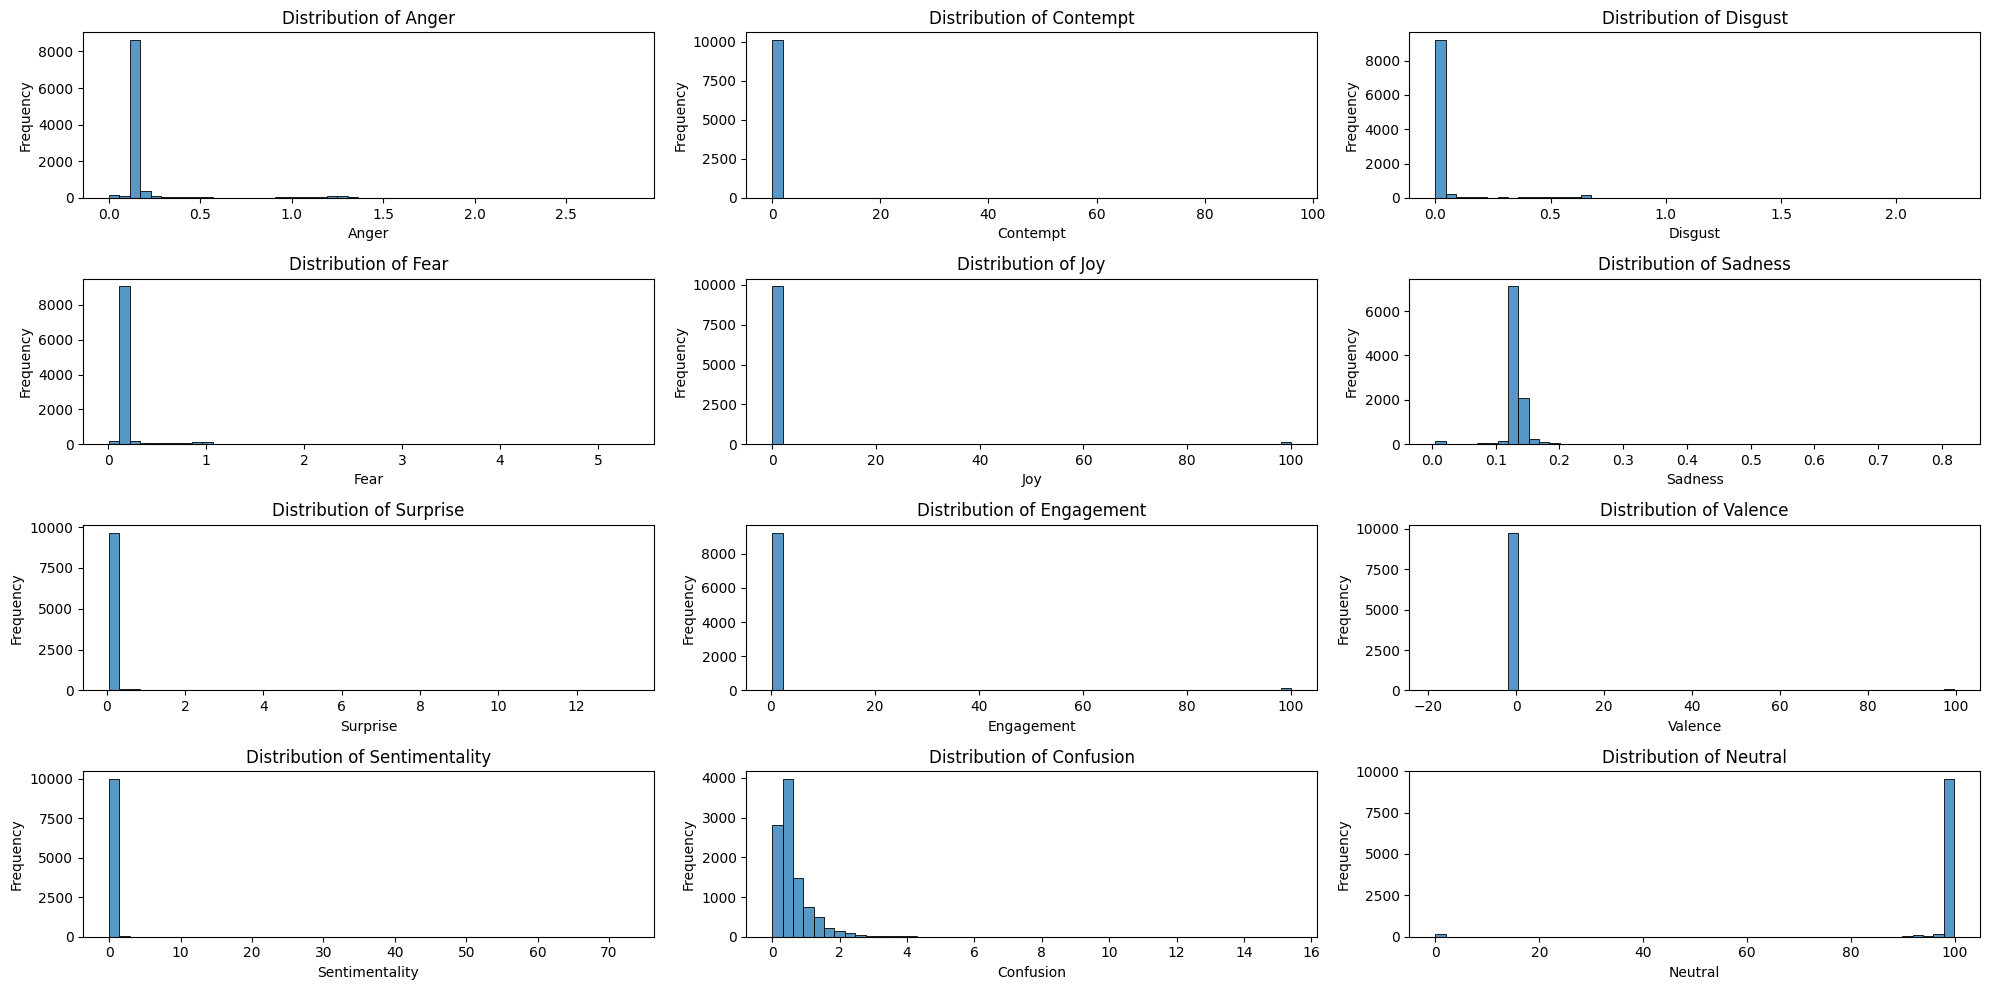

In [58]:
# 1. Plot Emotion Distributions
print("Generating emotion distributions...")
emotion_cols = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 
               'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral']

plt.figure(figsize=(20, 10))
for i, col in enumerate(emotion_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=tv, x=col, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
# plt.savefig('tiva_visualizations/emotion_distributions.png')
plt.show()

* The participants largely maintained a neutral emotional state during the task, as seen in the dominance of Neutral at 100% in many frames.
* There were rare or weak occurrences of most emotions like anger, fear, sadness, joy, etc.
* Confusion seems to be the most variable non-neutral emotion, suggesting cognitive load or task difficulty impacted emotional expression.
* This distribution could support conclusions about emotional stability during the task or highlight moments of difficulty (linked with spikes in confusion).

In [60]:
# 5. Plot Attention Metrics
print("Generating attention metrics...")
attention_cols = ['Attention', 'Blink', 'BlinkRate']

plt.figure(figsize=(15, 5))
for i, col in enumerate(attention_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=tv, x=col, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
# plt.savefig('tiva_visualizations/attention_metrics.png')
plt.show()

Generating attention metrics...


 * **Distribution of Attention**
* Most values are tightly packed between 97 and 99.
* The distribution is right-skewed (tail towards lower values), with a sharp peak near 98.5–99.
* Interpretation: Participants maintained high attention levels most of the time during the task.

*  **Distribution of Blink**
* The metric appears to be binary (0 = no blink, 1 = blink).
* The vast majority of values are at 0 (no blink detected at that moment).
* Very few instances of 1 (blink occurred).
* Interpretation: Blinks were infrequent during task performance.

*  **Distribution of BlinkRate**
* BlinkRate shows a range of values, with most frequent rates between ~5 to ~15.
* The distribution shows a decline as blink rate increases, with fewer instances above 20–30.
* Interpretation: Most of the time, participants had a moderate blink rate, but higher blink rates were rare.



## **IVT**

In [61]:
import pandas as pd
iv=pd.read_csv('38_IVT.csv')
iv.head()

UnixTime  Row QuestionKey                   Timestamp  Gaze X  Gaze Y  \
0  1.676983e+09    1         NaN  2023-02-21 18:01:22.036998     NaN     NaN   
1  1.676983e+09    2         NaN  2023-02-21 18:01:22.040774   959.0   553.5   
2  1.676983e+09    3         NaN  2023-02-21 18:01:22.049090     NaN     NaN   
3  1.676983e+09    4         NaN  2023-02-21 18:01:22.057443   969.0   562.0   
4  1.676983e+09    5         NaN  2023-02-21 18:01:22.065740   959.0   566.5   

   Interpolated Gaze X  Interpolated Gaze Y  Interpolated Distance  \
0                  NaN                  NaN                    NaN   
1                959.0                553.5             581.655609   
2                  NaN                  NaN                    NaN   
3                969.0                562.0             585.755615   
4                959.0                566.5             582.022736   

   Gaze Velocity  ...  Saccade Index  Saccade Index by Stimulus  \
0            NaN  ...            NaN                        NaN   
1            NaN  ...            NaN                        NaN   
2            NaN  ...            NaN                        NaN   
3            NaN  ...            NaN                        NaN   
4            NaN  ...            NaN                        NaN   

   Saccade Start  Saccade End  Saccade Duration  Saccade Amplitude  \
0            NaN          NaN               NaN                NaN   
1            NaN          NaN               NaN                NaN   
2            NaN          NaN               NaN                NaN   
3            NaN          NaN               NaN                NaN   
4            NaN          NaN               NaN                NaN   

   Saccade Peak Velocity  Saccade Peak Acceleration  \
0                    NaN                        NaN   
1                    NaN                        NaN   
2                    NaN                        NaN   
3                    NaN                        NaN   
4                    NaN                        NaN   

   Saccade Peak Deceleration  Saccade Direction  
0                        NaN                NaN  
1                        NaN                NaN  
2                        NaN                NaN  
3                        NaN                NaN  
4                        NaN                NaN  

[5 rows x 29 columns]

In [62]:
iv.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119765    False
119766    False
119767    False
119768    False
119769    False
Length: 119770, dtype: bool

In [63]:
iv.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119765    False
119766    False
119767    False
119768    False
119769    False
Length: 119770, dtype: bool

In [64]:
iv.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119765    False
119766    False
119767    False
119768    False
119769    False
Length: 119770, dtype: bool

In [65]:
iv.dtypes

UnixTime                      float64
Row                             int64
QuestionKey                    object
Timestamp                      object
Gaze X                        float64
Gaze Y                        float64
Interpolated Gaze X           float64
Interpolated Gaze Y           float64
Interpolated Distance         float64
Gaze Velocity                 float64
Gaze Acceleration             float64
Fixation Index                float64
Fixation Index by Stimulus    float64
Fixation X                    float64
Fixation Y                    float64
Fixation Start                float64
Fixation End                  float64
Fixation Duration             float64
Fixation Dispersion           float64
Saccade Index                 float64
Saccade Index by Stimulus     float64
Saccade Start                 float64
Saccade End                   float64
Saccade Duration              float64
Saccade Amplitude             float64
Saccade Peak Velocity         float64
Saccade Peak

In [66]:
iv['Timestamp'] = pd.to_datetime(iv['Timestamp'], errors='coerce')

In [67]:
# Identify columns with outliers using IQR
numeric_cols = iv.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = iv[col].quantile(0.25)
    Q3 = iv[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((iv[col] < lower) | (iv[col] > upper)).any():
        outlier_cols.append(col)

In [68]:

# Fill nulls: median for columns with outliers, mean for other numeric, mode for object
for col in iv.columns:
    if iv[col].isnull().any():
        if col in outlier_cols:
            iv[col] = iv[col].fillna(iv[col].median())
        elif iv[col].dtype in ['float64', 'int64']:
            iv[col] = iv[col].fillna(iv[col].mean())
        else:
            iv[col] = iv[col].fillna(iv[col].mode()[0])

In [69]:
iv.isnull().sum()

UnixTime                      0
Row                           0
QuestionKey                   0
Timestamp                     0
Gaze X                        0
Gaze Y                        0
Interpolated Gaze X           0
Interpolated Gaze Y           0
Interpolated Distance         0
Gaze Velocity                 0
Gaze Acceleration             0
Fixation Index                0
Fixation Index by Stimulus    0
Fixation X                    0
Fixation Y                    0
Fixation Start                0
Fixation End                  0
Fixation Duration             0
Fixation Dispersion           0
Saccade Index                 0
Saccade Index by Stimulus     0
Saccade Start                 0
Saccade End                   0
Saccade Duration              0
Saccade Amplitude             0
Saccade Peak Velocity         0
Saccade Peak Acceleration     0
Saccade Peak Deceleration     0
Saccade Direction             0
dtype: int64

In [70]:
iv_cr=iv.select_dtypes(include=['float64','int64'])
iv_corr=iv_cr.corr().round(2)
iv_corr

UnixTime   Row  Gaze X  Gaze Y  \
UnixTime                        1.00  1.00    0.10    0.02   
Row                             1.00  1.00    0.10    0.02   
Gaze X                          0.10  0.10    1.00    0.05   
Gaze Y                          0.02  0.02    0.05    1.00   
Interpolated Gaze X             0.10  0.10    1.00    0.05   
Interpolated Gaze Y             0.02  0.02    0.05    1.00   
Interpolated Distance          -0.45 -0.45   -0.36   -0.03   
Gaze Velocity                  -0.00 -0.00   -0.05    0.00   
Gaze Acceleration              -0.00 -0.00   -0.00    0.00   
Fixation Index                  0.84  0.84    0.10    0.02   
Fixation Index by Stimulus      0.84  0.84    0.10    0.02   
Fixation X                      0.09  0.09    0.89    0.04   
Fixation Y                      0.03  0.03    0.05    0.85   
Fixation Start                  0.84  0.84    0.10    0.02   
Fixation End                    0.84  0.84    0.10    0.02   
Fixation Duration               0.10  0.10    0.21   -0.05   
Fixation Dispersion            -0.08 -0.08   -0.17    0.05   
Saccade Index                   0.34  0.34    0.03    0.02   
Saccade Index by Stimulus       0.34  0.34    0.03    0.02   
Saccade Start                   0.34  0.34    0.03    0.02   
Saccade End                     0.34  0.34    0.03    0.02   
Saccade Duration                0.04  0.04   -0.02   -0.01   
Saccade Amplitude               0.04  0.04   -0.02   -0.01   
Saccade Peak Velocity           0.03  0.03   -0.02   -0.01   
Saccade Peak Acceleration       0.02  0.02   -0.01   -0.00   
Saccade Peak Deceleration      -0.03 -0.03    0.01    0.00   
Saccade Direction               0.00  0.00    0.02   -0.00   

                            Interpolated Gaze X  Interpolated Gaze Y  \
UnixTime                                   0.10                 0.02   
Row                                        0.10                 0.02   
Gaze X                                     1.00                 0.05   
Gaze Y                                     0.05                 1.00   
Interpolated Gaze X                        1.00                 0.05   
Interpolated Gaze Y                        0.05                 1.00   
Interpolated Distance                     -0.37                -0.03   
Gaze Velocity                             -0.05                 0.00   
Gaze Acceleration                          0.00                -0.00   
Fixation Index                             0.10                 0.02   
Fixation Index by Stimulus                 0.10                 0.02   
Fixation X                                 0.89                 0.04   
Fixation Y                                 0.05                 0.85   
Fixation Start                             0.10                 0.02   
Fixation End                               0.10                 0.02   
Fixation Duration                          0.21                -0.06   
Fixation Dispersion                       -0.17                 0.05   
Saccade Index                              0.03                 0.02   
Saccade Index by Stimulus                  0.03                 0.02   
Saccade Start                              0.03                 0.02   
Saccade End                                0.03                 0.02   
Saccade Duration                          -0.02                -0.01   
Saccade Amplitude                         -0.02                -0.01   
Saccade Peak Velocity                     -0.02                -0.01   
Saccade Peak Acceleration                 -0.01                -0.00   
Saccade Peak Deceleration                  0.01                 0.00   
Saccade Direction                          0.02                -0.00   

                            Interpolated Distance  Gaze Velocity  \
UnixTime                                    -0.45          -0.00   
Row                                         -0.45          -0.00   
Gaze X                                      -0.36          -0.05   
Ga

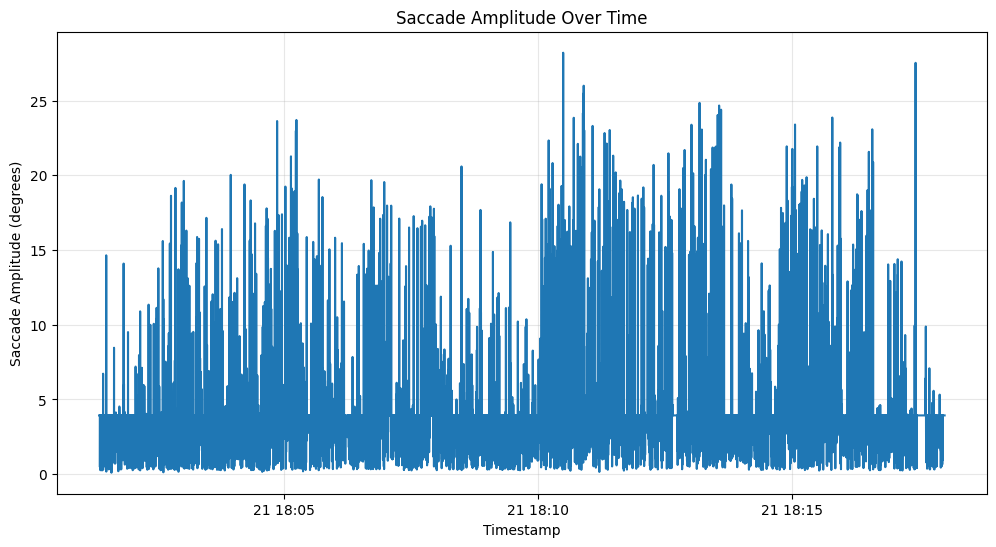

In [71]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='Timestamp', y='Saccade Amplitude', data=iv)
plt.title('Saccade Amplitude Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Saccade Amplitude (degrees)')
plt.grid(alpha=0.3)
# plt.tight_layout()
plt.show()

* Periods of high saccade amplitude (peaks)
➡ These are moments where the participant’s eye made large movements — possibly scanning for targets, switching between stimuli, or being unsure where to look.

* Periods of low saccade amplitude (flat areas)
➡ These are times when eye movements were small → focused attention on one area or careful local inspection.

* Variation across time
➡ The plot shows fluctuations — alternating between searching/exploring (high saccades) and focusing (low saccades).
➡ Could reflect task difficulty, attention shifts, or changes in mental strategy.

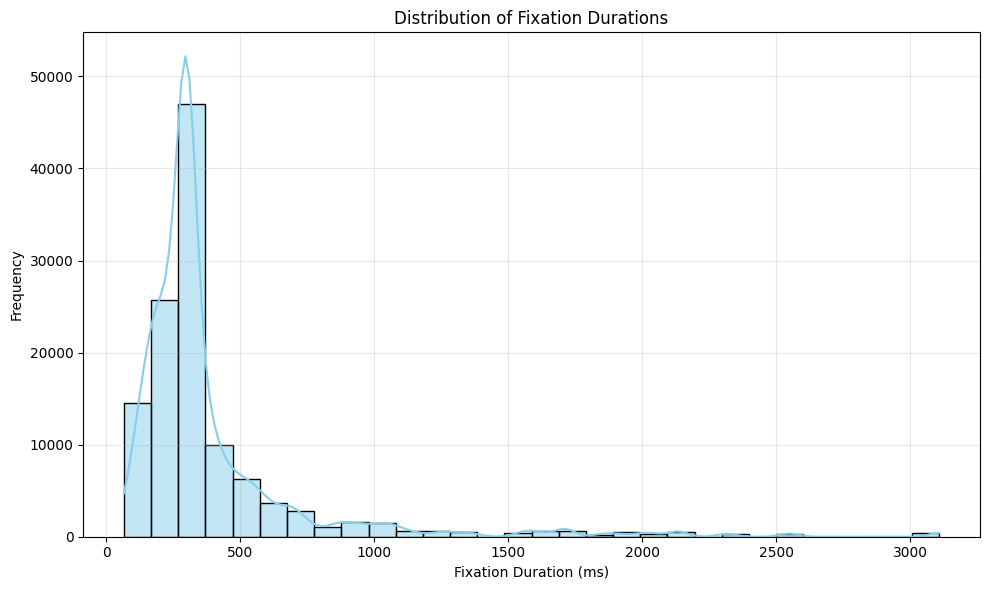

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(iv['Fixation Duration'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Fixation Durations')
plt.xlabel('Fixation Duration (ms)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


* Most fixations are short (clustered on the left side, < 500 ms).
* There is a long right tail → a few fixations lasted much longer (up to 8000 ms), but they are rare.
* The distribution is positively skewed (long tail to the right).

* Fixation duration reflects cognitive processing:
* Short fixations (~100–300 ms) → normal reading, scanning, or simple processing.
* Long fixations (>500 ms) → deeper cognitive effort, difficulty, confusion, or decision making.
* Outliers (extreme durations) → could indicate distraction, system pauses, or recording artifacts.

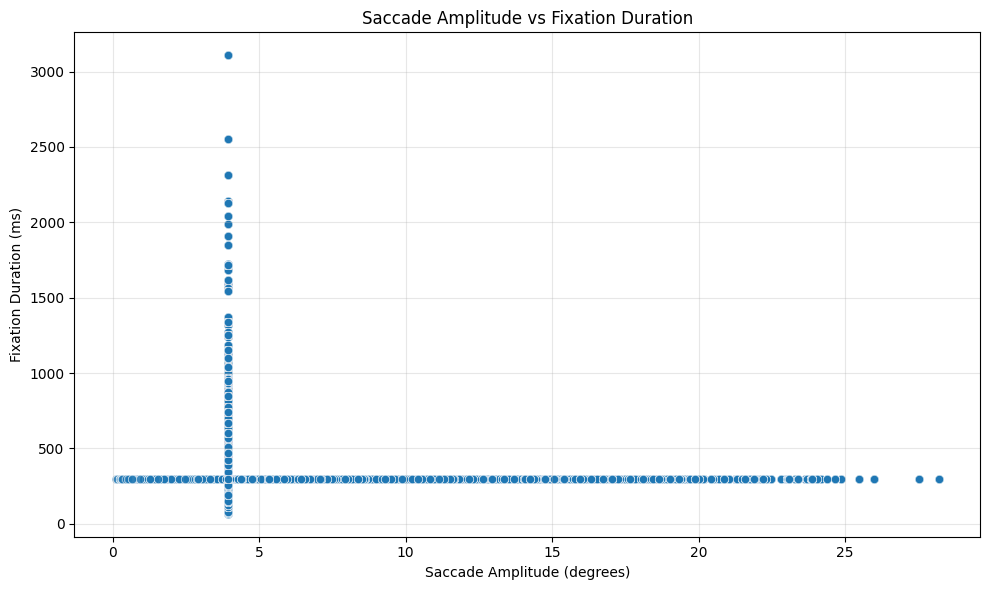

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Saccade Amplitude', y='Fixation Duration', data=iv, alpha=0.5)
plt.title('Saccade Amplitude vs Fixation Duration')
plt.xlabel('Saccade Amplitude (degrees)')
plt.ylabel('Fixation Duration (ms)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Eye-tracking data showed dynamic shifts between exploratory and focused viewing, as seen in the variation of saccade amplitude over time.

Participants demonstrated a mix of short and long fixations, indicating phases of fast scanning and deep analysis.

Gaze patterns revealed that certain areas of the task space received repeated attention, possibly linked to key task elements.

The combination of saccade size and fixation time can give clues about whether participants are searching or processing.

## **EYE**

In [74]:
ey=pd.read_csv('38_EYE.csv') 
ey.head()

UnixTime  Row QuestionKey                   Timestamp  ET_GazeLeftx  \
0  1.676983e+09    1         NaN  2023-02-21 18:01:22.036998           NaN   
1  1.676983e+09    2         NaN  2023-02-21 18:01:22.040774         951.0   
2  1.676983e+09    3         NaN  2023-02-21 18:01:22.049090          -1.0   
3  1.676983e+09    4         NaN  2023-02-21 18:01:22.057443         969.0   
4  1.676983e+09    5         NaN  2023-02-21 18:01:22.065740         967.0   

   ET_GazeLefty  ET_GazeRightx  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  \
0           NaN            NaN            NaN           NaN            NaN   
1         549.0          967.0          558.0          -1.0           -1.0   
2          -1.0           -1.0           -1.0          -1.0           -1.0   
3         562.0           -1.0           -1.0          -1.0           -1.0   
4         566.0          951.0          567.0          -1.0           -1.0   

   ET_TimeSignal  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
0            NaN              NaN               NaN             NaN   
1         50.031       585.598022        577.713196        0.545142   
2         58.347        -1.000000         -1.000000       -1.000000   
3         66.701       585.755615         -1.000000        0.545161   
4         74.997       585.878784        578.166687        0.545319   

   ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  ET_ValidityLeft  \
0             NaN              NaN              NaN              NaN   
1        0.504267         0.406079         0.510878              0.0   
2       -1.000000        -1.000000        -1.000000              4.0   
3        0.504221        -1.000000        -1.000000              0.0   
4        0.504338         0.406309         0.510990              0.0   

   ET_ValidityRight  
0               NaN  
1               0.0  
2               4.0  
3               4.0  
4               0.0

In [75]:
ey.isnull().sum()

UnixTime                0
Row                     0
QuestionKey         41119
Timestamp               0
ET_GazeLeftx            4
ET_GazeLefty            4
ET_GazeRightx           4
ET_GazeRighty           4
ET_PupilLeft            4
ET_PupilRight           4
ET_TimeSignal           4
ET_DistanceLeft         4
ET_DistanceRight        4
ET_CameraLeftX          4
ET_CameraLeftY          4
ET_CameraRightX         4
ET_CameraRightY         4
ET_ValidityLeft         4
ET_ValidityRight        4
dtype: int64

In [76]:
ey.shape

(119770, 19)

In [77]:
ey_cr=ey.select_dtypes(include=['float64','int64'])
ey_corr=ey_cr.corr().round(2)
ey_corr

UnixTime   Row  ET_GazeLeftx  ET_GazeLefty  ET_GazeRightx  \
UnixTime              1.00  1.00          0.05          0.01           0.15   
Row                   1.00  1.00          0.05          0.01           0.15   
ET_GazeLeftx          0.05  0.05          1.00          0.68           0.40   
ET_GazeLefty          0.01  0.01          0.68          1.00           0.02   
ET_GazeRightx         0.15  0.15          0.40          0.02           1.00   
ET_GazeRighty         0.11  0.11          0.12          0.35           0.52   
ET_PupilLeft          0.05  0.05         -0.03          0.14          -0.14   
ET_PupilRight         0.01  0.01         -0.58         -0.60           0.15   
ET_TimeSignal         1.00  1.00          0.05          0.01           0.15   
ET_DistanceLeft      -0.01 -0.01          0.75          0.88          -0.02   
ET_DistanceRight      0.13  0.13          0.08          0.12           0.62   
ET_CameraLeftX       -0.00 -0.00          0.75          0.88          -0.02   
ET_CameraLeftY        0.00  0.00          0.75          0.88          -0.02   
ET_CameraRightX       0.14  0.14          0.08          0.12           0.64   
ET_CameraRightY       0.15  0.15          0.09          0.12           0.64   
ET_ValidityLeft      -0.00 -0.00         -0.75         -0.88           0.02   
ET_ValidityRight     -0.15 -0.15         -0.09         -0.12          -0.64   

                  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  ET_TimeSignal  \
UnixTime                   0.11          0.05           0.01           1.00   
Row                        0.11          0.05           0.01           1.00   
ET_GazeLeftx               0.12         -0.03          -0.58           0.05   
ET_GazeLefty               0.35          0.14          -0.60           0.01   
ET_GazeRightx              0.52         -0.14           0.15           0.15   
ET_GazeRighty              1.00          0.02           0.17           0.11   
ET_PupilLeft               0.02          1.00           0.34           0.05   
ET_PupilRight              0.17          0.34           1.00           0.01   
ET_TimeSignal              0.11          0.05           0.01           1.00   
ET_DistanceLeft            0.10          0.17          -0.67          -0.01   
ET_DistanceRight           0.75          0.05           0.26           0.13   
ET_CameraLeftX             0.10          0.17          -0.67          -0.00   
ET_CameraLeftY             0.10          0.17          -0.67           0.00   
ET_CameraRightX            0.75          0.04           0.26           0.14   
ET_CameraRightY            0.76          0.04           0.26           0.15   
ET_ValidityLeft           -0.10         -0.17           0.67          -0.00   
ET_ValidityRight          -0.75         -0.04          -0.26          -0.15   

                  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
UnixTime                    -0.01              0.13           -0.00   
Row                         -0.01              0.13           -0.00   
ET_GazeLeftx                 0.75              0.08            0.75   
ET_GazeLefty                 0.88              0.12            0.88   
ET_GazeRightx               -0.02              0.62           -0.02   
ET_GazeRighty                0.10              0.75            0.10   
ET_PupilLeft                 0.17              0.05            0.17   
ET_PupilRight               -0.67              0.26           -0.67   
ET_TimeSignal               -0.01              0.13           -0.00   
ET_DistanceLeft              1.00              0.09            1.00   
ET_DistanceRight             0.09              1.00            0.09   
ET_CameraLeftX               1.00              0.09            1.00   
ET_CameraLeftY               1.00              0.09            1.00   
ET_CameraRightX              0.09              1.00            0.09   
ET_CameraRightY              0.09              1.00            0.09   
ET_ValidityLeft             -1.00   

In [78]:
ey.dtypes

UnixTime            float64
Row                   int64
QuestionKey          object
Timestamp            object
ET_GazeLeftx        float64
ET_GazeLefty        float64
ET_GazeRightx       float64
ET_GazeRighty       float64
ET_PupilLeft        float64
ET_PupilRight       float64
ET_TimeSignal       float64
ET_DistanceLeft     float64
ET_DistanceRight    float64
ET_CameraLeftX      float64
ET_CameraLeftY      float64
ET_CameraRightX     float64
ET_CameraRightY     float64
ET_ValidityLeft     float64
ET_ValidityRight    float64
dtype: object

In [79]:

ey['Timestamp'] = pd.to_datetime(ey['Timestamp'],errors='coerce')


In [80]:
# Identify columns with outliers using IQR
numeric_cols = ey.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = ey[col].quantile(0.25)
    Q3 = ey[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((ey[col] < lower) | (ey[col] > upper)).any():
        outlier_cols.append(col)

In [81]:
for col in ey.columns:
    if ey[col].isnull().any():
        if col in outlier_cols:
            ey[col] = ey[col].fillna(ey[col].median())
        elif ey[col].dtype in ['float64', 'int64']:
            ey[col] = ey[col].fillna(ey[col].mean())
        else:
            ey[col] = ey[col].fillna(ey[col].mode()[0])

In [82]:
ey.isnull().sum()

UnixTime            0
Row                 0
QuestionKey         0
Timestamp           0
ET_GazeLeftx        0
ET_GazeLefty        0
ET_GazeRightx       0
ET_GazeRighty       0
ET_PupilLeft        0
ET_PupilRight       0
ET_TimeSignal       0
ET_DistanceLeft     0
ET_DistanceRight    0
ET_CameraLeftX      0
ET_CameraLeftY      0
ET_CameraRightX     0
ET_CameraRightY     0
ET_ValidityLeft     0
ET_ValidityRight    0
dtype: int64

In [83]:
ey.dtypes

UnixTime                   float64
Row                          int64
QuestionKey                 object
Timestamp           datetime64[ns]
ET_GazeLeftx               float64
ET_GazeLefty               float64
ET_GazeRightx              float64
ET_GazeRighty              float64
ET_PupilLeft               float64
ET_PupilRight              float64
ET_TimeSignal              float64
ET_DistanceLeft            float64
ET_DistanceRight           float64
ET_CameraLeftX             float64
ET_CameraLeftY             float64
ET_CameraRightX            float64
ET_CameraRightY            float64
ET_ValidityLeft            float64
ET_ValidityRight           float64
dtype: object

In [84]:
ey.columns.tolist()

['UnixTime',
 'Row',
 'QuestionKey',
 'Timestamp',
 'ET_GazeLeftx',
 'ET_GazeLefty',
 'ET_GazeRightx',
 'ET_GazeRighty',
 'ET_PupilLeft',
 'ET_PupilRight',
 'ET_TimeSignal',
 'ET_DistanceLeft',
 'ET_DistanceRight',
 'ET_CameraLeftX',
 'ET_CameraLeftY',
 'ET_CameraRightX',
 'ET_CameraRightY',
 'ET_ValidityLeft',
 'ET_ValidityRight']

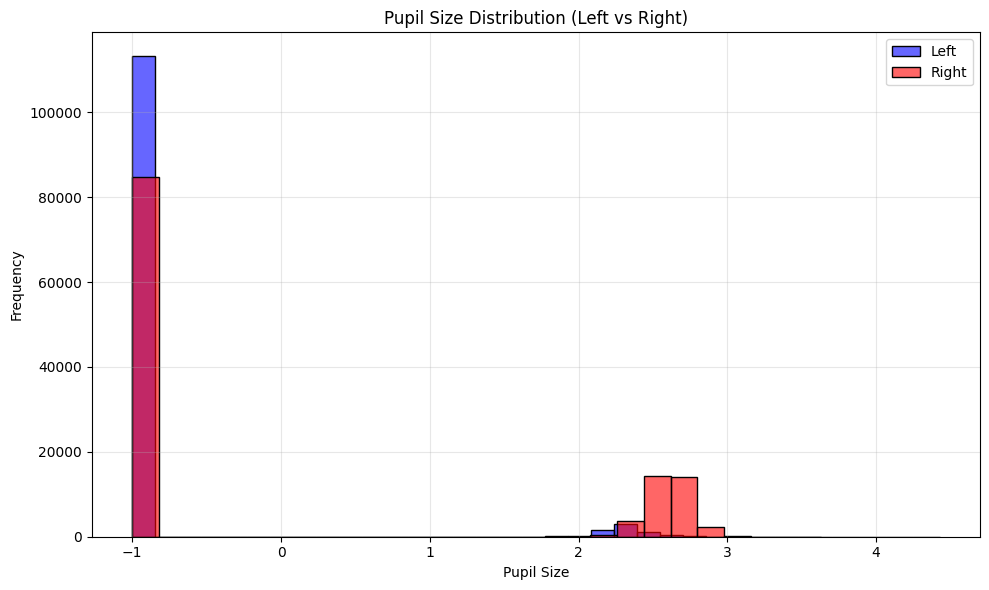

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(ey['ET_PupilLeft'], bins=30, color='blue', label='Left', alpha=0.6)
sns.histplot(ey['ET_PupilRight'], bins=30, color='red', label='Right', alpha=0.6)
plt.title('Pupil Size Distribution (Left vs Right)')
plt.xlabel('Pupil Size')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- Similar distributions → consistent tracking + lighting.
- Bigger pupil sizes → possibly higher cognitive effort or arousal.


In [86]:
validity = pd.concat([
    ey['ET_ValidityLeft'].rename('Validity').to_frame(),
    ey['ET_ValidityRight'].rename('Validity').to_frame()
])

plt.figure(figsize=(8, 6))
sns.countplot(x='Validity', data=validity)
plt.title('Eye-Tracking Data Validity Codes (Combined Left + Right)')
plt.xlabel('Validity Code')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




0 = good validity

Higher numbers = reduced data quality

Inference
-Mostly 0s → clean data
-Many 4→ noise, may need filtering

In [87]:
# Clean keys to match
ey['CleanKey'] = ey['QuestionKey'].astype(str).str.replace(r'^\d+', '', regex=True).str.strip().str.lower()
psy['QuestionNumber'] = psy['QuestionNumber'].astype(str).str.strip().str.lower()

# Define strategy in PSY
RT_THRESHOLD = 5
psy['Strategy'] = psy['ResponseTime'].apply(lambda x: 'Holistic' if x < RT_THRESHOLD else 'Piecemeal')

# Merge
ey = ey.merge(
    psy[['QuestionNumber', 'ResponseTime', 'Strategy']],
    left_on='CleanKey',
    right_on='QuestionNumber',
    how='left'
)

# Check merge worked
print(ey[['CleanKey', 'ResponseTime', 'Strategy']].head())


  CleanKey  ResponseTime   Strategy
0    item8         65.57  Piecemeal
1    item8         54.91  Piecemeal
2    item8         29.52  Piecemeal
3    item8         65.57  Piecemeal
4    item8         54.91  Piecemeal


C:\Users\Hp\AppData\Local\Temp\ipykernel_22456\1595222774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=ey, x='Strategy', y='ET_PupilLeft', inner='quartile', palette='Set2')


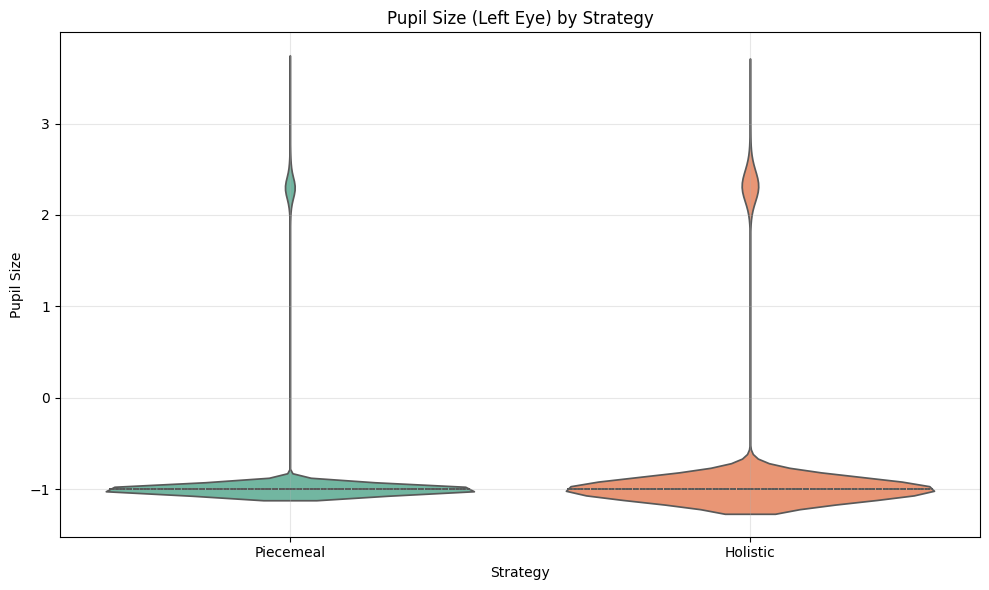

In [88]:


plt.figure(figsize=(10, 6))
sns.violinplot(data=ey, x='Strategy', y='ET_PupilLeft', inner='quartile', palette='Set2')
plt.title('Pupil Size (Left Eye) by Strategy')
plt.xlabel('Strategy')
plt.ylabel('Pupil Size')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


* **Piecemeal strategy**

* Pupil size is mostly clustered around a small value (possibly near zero or slightly negative due to scaling or artifact).

* There’s a narrow concentration at a higher value (~2.5), but it’s rare.

* **Holistic strategy**

* Similar pattern: most pupil sizes cluster near the small values.

* A small number of data points at higher pupil sizes (again ~2.5).

* **In both strategies:**

The bulk of pupil size values are small (or normalized near 0 / -1).

The large pupil sizes (~2.5-3) occur infrequently.

## **BlankScreenData**

In [89]:
bd=pd.read_csv('38_BlankScreenData.csv')
bd.head()

UnixTime   Row       Segment                   Timestamp  ET_GazeLeftx  \
0  1.676983e+09  7858  BlankScreen1  2023-02-21 18:02:27.493821          -1.0   
1  1.676983e+09  7859  BlankScreen1  2023-02-21 18:02:27.502058        1490.0   
2  1.676983e+09  7860  BlankScreen1  2023-02-21 18:02:27.510419        1065.0   
3  1.676983e+09  7861  BlankScreen1  2023-02-21 18:02:27.518721          -1.0   
4  1.676983e+09  7862  BlankScreen1  2023-02-21 18:02:27.527124         903.0   

   ET_GazeLefty  ET_GazeRightx  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  \
0          -1.0         1719.0          915.0          -1.0       2.962051   
1         802.0           -1.0           -1.0          -1.0      -1.000000   
2         598.0         1627.0          978.0          -1.0      -1.000000   
3          -1.0           -1.0           -1.0          -1.0      -1.000000   
4         551.0          905.0          584.0          -1.0      -1.000000   

   ET_TimeSignal  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
0      65503.078        -1.000000        551.023865       -1.000000   
1      65511.316       571.489258         -1.000000        0.531595   
2      65519.677       571.472900        550.359314        0.532599   
3      65527.977        -1.000000         -1.000000       -1.000000   
4      65536.382       571.483704        550.548035        0.533730   

   ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  ET_ValidityLeft  \
0       -1.000000         0.410472         0.506700              4.0   
1        0.501582        -1.000000        -1.000000              0.0   
2        0.501504         0.392782         0.510693              0.0   
3       -1.000000        -1.000000        -1.000000              4.0   
4        0.501252         0.394316         0.510338              0.0   

   ET_ValidityRight  
0               0.0  
1               4.0  
2               0.0  
3               4.0  
4               0.0

In [90]:
bd.dtypes

UnixTime            float64
Row                   int64
Segment              object
Timestamp            object
ET_GazeLeftx        float64
ET_GazeLefty        float64
ET_GazeRightx       float64
ET_GazeRighty       float64
ET_PupilLeft        float64
ET_PupilRight       float64
ET_TimeSignal       float64
ET_DistanceLeft     float64
ET_DistanceRight    float64
ET_CameraLeftX      float64
ET_CameraLeftY      float64
ET_CameraRightX     float64
ET_CameraRightY     float64
ET_ValidityLeft     float64
ET_ValidityRight    float64
dtype: object

In [91]:
bd['Timestamp'] = pd.to_datetime(bd['Timestamp'], errors='coerce')

In [92]:
bd.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5395    False
5396    False
5397    False
5398    False
5399    False
Length: 5400, dtype: bool

In [93]:
bd.isnull().sum()

UnixTime            0
Row                 0
Segment             0
Timestamp           0
ET_GazeLeftx        0
ET_GazeLefty        0
ET_GazeRightx       0
ET_GazeRighty       0
ET_PupilLeft        0
ET_PupilRight       0
ET_TimeSignal       0
ET_DistanceLeft     0
ET_DistanceRight    0
ET_CameraLeftX      0
ET_CameraLeftY      0
ET_CameraRightX     0
ET_CameraRightY     0
ET_ValidityLeft     0
ET_ValidityRight    0
dtype: int64

In [94]:
# Identify columns with outliers using IQR
numeric_cols = bd.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = bd[col].quantile(0.25)
    Q3 = bd[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((bd[col] < lower) | (bd[col] > upper)).any():
        print(outlier_cols.append(col))

None
None
None
None
None
None
None


In [95]:
bd_cr=bd.select_dtypes(include=['float64','int64'])
bd_corr=bd_cr.corr().round(2)
bd_corr

UnixTime   Row  ET_GazeLeftx  ET_GazeLefty  ET_GazeRightx  \
UnixTime              1.00  1.00          0.07          0.08           0.21   
Row                   1.00  1.00          0.07          0.08           0.21   
ET_GazeLeftx          0.07  0.07          1.00          0.88           0.23   
ET_GazeLefty          0.08  0.08          0.88          1.00           0.08   
ET_GazeRightx         0.21  0.21          0.23          0.08           1.00   
ET_GazeRighty         0.19  0.19          0.07          0.12           0.82   
ET_PupilLeft          0.19  0.19          0.10          0.13           0.03   
ET_PupilRight         0.05  0.05         -0.62         -0.67           0.22   
ET_TimeSignal         1.00  1.00          0.07          0.08           0.21   
ET_DistanceLeft       0.08  0.08          0.86          0.95           0.04   
ET_DistanceRight      0.24  0.24          0.01          0.05           0.78   
ET_CameraLeftX        0.08  0.08          0.86          0.95           0.04   
ET_CameraLeftY        0.09  0.09          0.86          0.95           0.04   
ET_CameraRightX       0.24  0.24          0.02          0.05           0.79   
ET_CameraRightY       0.25  0.25          0.02          0.05           0.79   
ET_ValidityLeft      -0.08 -0.08         -0.86         -0.95          -0.04   
ET_ValidityRight     -0.25 -0.25         -0.02         -0.05          -0.79   

                  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  ET_TimeSignal  \
UnixTime                   0.19          0.19           0.05           1.00   
Row                        0.19          0.19           0.05           1.00   
ET_GazeLeftx               0.07          0.10          -0.62           0.07   
ET_GazeLefty               0.12          0.13          -0.67           0.08   
ET_GazeRightx              0.82          0.03           0.22           0.21   
ET_GazeRighty              1.00          0.06           0.24           0.19   
ET_PupilLeft               0.06          1.00           0.30           0.19   
ET_PupilRight              0.24          0.30           1.00           0.05   
ET_TimeSignal              0.19          0.19           0.05           1.00   
ET_DistanceLeft            0.06          0.14          -0.70           0.08   
ET_DistanceRight           0.89          0.08           0.28           0.24   
ET_CameraLeftX             0.06          0.14          -0.70           0.08   
ET_CameraLeftY             0.07          0.14          -0.70           0.09   
ET_CameraRightX            0.89          0.07           0.28           0.24   
ET_CameraRightY            0.89          0.08           0.28           0.25   
ET_ValidityLeft           -0.07         -0.14           0.70          -0.08   
ET_ValidityRight          -0.89         -0.07          -0.28          -0.25   

                  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
UnixTime                     0.08              0.24            0.08   
Row                          0.08              0.24            0.08   
ET_GazeLeftx                 0.86              0.01            0.86   
ET_GazeLefty                 0.95              0.05            0.95   
ET_GazeRightx                0.04              0.78            0.04   
ET_GazeRighty                0.06              0.89            0.06   
ET_PupilLeft                 0.14              0.08            0.14   
ET_PupilRight               -0.70              0.28           -0.70   
ET_TimeSignal                0.08              0.24            0.08   
ET_DistanceLeft              1.00              0.06            1.00   
ET_DistanceRight             0.06              1.00            0.06   
ET_CameraLeftX               1.00              0.06            1.00   
ET_CameraLeftY               1.00              0.06            1.00   
ET_CameraRightX              0.05              1.00            0.06   
ET_CameraRightY              0.06              1.00            0.06   
ET_ValidityLeft             -1.00   

In [96]:
bd.head()

UnixTime   Row       Segment                  Timestamp  ET_GazeLeftx  \
0  1.676983e+09  7858  BlankScreen1 2023-02-21 18:02:27.493821          -1.0   
1  1.676983e+09  7859  BlankScreen1 2023-02-21 18:02:27.502058        1490.0   
2  1.676983e+09  7860  BlankScreen1 2023-02-21 18:02:27.510419        1065.0   
3  1.676983e+09  7861  BlankScreen1 2023-02-21 18:02:27.518721          -1.0   
4  1.676983e+09  7862  BlankScreen1 2023-02-21 18:02:27.527124         903.0   

   ET_GazeLefty  ET_GazeRightx  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  \
0          -1.0         1719.0          915.0          -1.0       2.962051   
1         802.0           -1.0           -1.0          -1.0      -1.000000   
2         598.0         1627.0          978.0          -1.0      -1.000000   
3          -1.0           -1.0           -1.0          -1.0      -1.000000   
4         551.0          905.0          584.0          -1.0      -1.000000   

   ET_TimeSignal  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
0      65503.078        -1.000000        551.023865       -1.000000   
1      65511.316       571.489258         -1.000000        0.531595   
2      65519.677       571.472900        550.359314        0.532599   
3      65527.977        -1.000000         -1.000000       -1.000000   
4      65536.382       571.483704        550.548035        0.533730   

   ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  ET_ValidityLeft  \
0       -1.000000         0.410472         0.506700              4.0   
1        0.501582        -1.000000        -1.000000              0.0   
2        0.501504         0.392782         0.510693              0.0   
3       -1.000000        -1.000000        -1.000000              4.0   
4        0.501252         0.394316         0.510338              0.0   

   ET_ValidityRight  
0               0.0  
1               4.0  
2               0.0  
3               4.0  
4               0.0

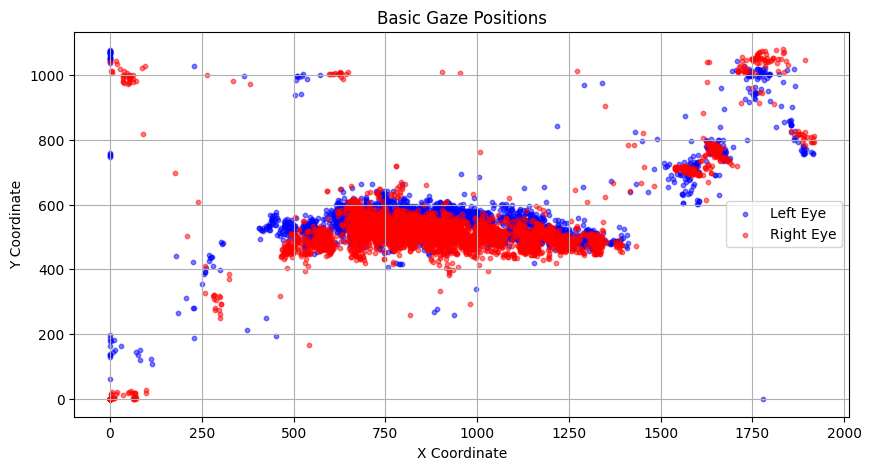

In [97]:
plt.figure(figsize=(10, 5))

# Left eye
plt.scatter(bd['ET_GazeLeftx'], bd['ET_GazeLefty'], 
            alpha=0.5, s=10, label='Left Eye', color='blue')

# Right eye
plt.scatter(bd['ET_GazeRightx'], bd['ET_GazeRighty'], 
            alpha=0.5, s=10, label='Right Eye', color='red')

plt.title('Basic Gaze Positions')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()

- Fixation clusters: Dense point clouds show where the eyes lingered (even on a blank screen, this may reveal default gaze patterns)
- Tracking alignment: If red/blue dots overlap well → good binocular tracking. If separated → possible calibration issues
- Data coverage: Gaps indicate missing data (e.g., during blinks)